In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
aqi=pd.read_csv("aqi.csv")
aqi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235785 entries, 0 to 235784
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   date                           235785 non-null  object 
 1   state                          235785 non-null  object 
 2   area                           235785 non-null  object 
 3   number_of_monitoring_stations  235785 non-null  int64  
 4   prominent_pollutants           235785 non-null  object 
 5   aqi_value                      235785 non-null  int64  
 6   air_quality_status             235785 non-null  object 
 7   unit                           235785 non-null  object 
 8   note                           0 non-null       float64
dtypes: float64(1), int64(2), object(6)
memory usage: 16.2+ MB


In [22]:
city_stats = pd.DataFrame({
    'City': ["Delhi","Mumbai","Bengaluru","Hyderabad","Ahmedabad","Chennai","Kolkata",
             "Pune","Surat","Jaipur","Lucknow","Kanpur","Nagpur","Indore",
             "Patna","Bhopal","Ludhiana","Thane","Visakhapatnam","Coimbatore"],
    'income_per_capita': [461910,300000,433200,539000,643000,520000,139442,
                          275000,240000,150000,100000,100000,220000,130000,
                          60000,140000,180000,270000,140000,240000],
    'population_density': [16000,20500,12000,10500,11000,17000,22000,
                           9400,13000,6500,8100,6900,11000,9718,
                           17000,3887,5200,13000,2500,10052]
})
city_stats

City  income_per_capita  population_density
0           Delhi             461910               16000
1          Mumbai             300000               20500
2       Bengaluru             433200               12000
3       Hyderabad             539000               10500
4       Ahmedabad             643000               11000
5         Chennai             520000               17000
6         Kolkata             139442               22000
7            Pune             275000                9400
8           Surat             240000               13000
9          Jaipur             150000                6500
10        Lucknow             100000                8100
11         Kanpur             100000                6900
12         Nagpur             220000               11000
13         Indore             130000                9718
14          Patna              60000               17000
15         Bhopal             140000                3887
16       Ludhiana             180000                5200
17          Thane             270000               13000
18  Visakhapatnam             140000                2500
19     Coimbatore             240000               10052

In [23]:
aqi['area'] = aqi['area'].str.strip().str.title()
city_stats['City'] = city_stats['City'].str.strip().str.title()

In [24]:
top20_aqi = aqi[aqi['area'].isin(city_stats['City'])]
top20_aqi

date           state           area  \
11      30-04-2025         Gujarat      Ahmedabad   
19      30-04-2025     Maharashtra          Thane   
33      30-04-2025   Uttar Pradesh         Kanpur   
34      30-04-2025      Tamil Nadu        Chennai   
73      30-04-2025      Tamil Nadu     Coimbatore   
...            ...             ...            ...   
235750  01-04-2022   Uttar Pradesh        Lucknow   
235755  01-04-2022      Tamil Nadu        Chennai   
235757  01-04-2022  Andhra Pradesh  Visakhapatnam   
235778  01-04-2022       Telangana      Hyderabad   
235781  01-04-2022       Rajasthan         Jaipur   

        number_of_monitoring_stations prominent_pollutants  aqi_value  \
11                                  8           PM2.5,PM10        110   
19                                  2                 PM10         58   
33                                  3           PM2.5,PM10         89   
34                                  7           PM10,O3,CO         46   
73                                  1                   O3         61   
...                               ...                  ...        ...   
235750                              6           PM2.5,PM10        220   
235755                              8           PM10,O3,CO         45   
235757                              1                 PM10         95   
235778                              5           PM2.5,PM10        137   
235781                              3           PM2.5,PM10        158   

       air_quality_status                                               unit  \
11               Moderate  number_of_monitoring_stations in Absolute Numb...   
19           Satisfactory  number_of_monitoring_stations in Absolute Numb...   
33           Satisfactory  number_of_monitoring_stations in Absolute Numb...   
34                   Good  number_of_monitoring_stations in Absolute Numb...   
73           Satisfactory  number_of_monitoring_stations in Absolute Numb...   
...                   ...                                                ...   
235750               Poor  number_of_monitoring_stations in Absolute Numb...   
235755               Good  number_of_monitoring_stations in Absolute Numb...   
235757       Satisfactory  number_of_monitoring_stations in Absolute Numb...   
235778           Moderate  number_of_monitoring_stations in Absolute Numb...   
235781           Moderate  number_of_monitoring_stations in Absolute Numb...   

        note  
11       NaN  
19       NaN  
33       NaN  
34       NaN  
73       NaN  
...      ...  
235750   NaN  
235755   NaN  
235757   NaN  
235778   NaN  
235781   NaN  

[21241 rows x 9 columns]

In [25]:
print("Unique cities in top20_aqi:", top20_aqi['area'].nunique())
print("Missing cities from city_info_df:")
print(set(city_stats['City']) - set(top20_aqi['area'].unique()))


Unique cities in top20_aqi: 20
Missing cities from city_info_df:
set()


In [26]:
avg_aqi_per_city = top20_aqi.groupby('area')['aqi_value'].mean().reset_index()
avg_aqi_per_city.columns = ['City', 'Avg_AQI']

In [27]:
merged_df = pd.merge(city_stats, avg_aqi_per_city, on='City', how='inner')
merged_df

City  income_per_capita  population_density     Avg_AQI
0           Delhi             461910               16000  206.416889
1          Mumbai             300000               20500  105.933274
2       Bengaluru             433200               12000   74.885333
3       Hyderabad             539000               10500   81.012444
4       Ahmedabad             643000               11000  113.598573
5         Chennai             520000               17000   74.008014
6         Kolkata             139442               22000  102.028444
7            Pune             275000                9400  111.972973
8           Surat             240000               13000  116.571429
9          Jaipur             150000                6500  131.375111
10        Lucknow             100000                8100  131.123556
11         Kanpur             100000                6900  111.614222
12         Nagpur             220000               11000  111.113718
13         Indore             130000                9718   97.641187
14          Patna              60000               17000  179.927111
15         Bhopal             140000                3887  118.755835
16       Ludhiana             180000                5200  128.062950
17          Thane             270000               13000  109.292008
18  Visakhapatnam             140000                2500  116.107075
19     Coimbatore             240000               10052   69.563859

In [28]:
merged_df['Risk_Score'] = (
    merged_df['Avg_AQI'] * merged_df['population_density']
) / merged_df['income_per_capita']
merged_df

City  income_per_capita  population_density     Avg_AQI  \
0           Delhi             461910               16000  206.416889   
1          Mumbai             300000               20500  105.933274   
2       Bengaluru             433200               12000   74.885333   
3       Hyderabad             539000               10500   81.012444   
4       Ahmedabad             643000               11000  113.598573   
5         Chennai             520000               17000   74.008014   
6         Kolkata             139442               22000  102.028444   
7            Pune             275000                9400  111.972973   
8           Surat             240000               13000  116.571429   
9          Jaipur             150000                6500  131.375111   
10        Lucknow             100000                8100  131.123556   
11         Kanpur             100000                6900  111.614222   
12         Nagpur             220000               11000  111.113718   
13         Indore             130000                9718   97.641187   
14          Patna              60000               17000  179.927111   
15         Bhopal             140000                3887  118.755835   
16       Ludhiana             180000                5200  128.062950   
17          Thane             270000               13000  109.292008   
18  Visakhapatnam             140000                2500  116.107075   
19     Coimbatore             240000               10052   69.563859   

    Risk_Score  
0     7.150030  
1     7.238774  
2     2.074386  
3     1.578165  
4     1.943366  
5     2.419493  
6    16.097200  
7     3.827440  
8     6.314286  
9     5.692921  
10   10.621008  
11    7.701381  
12    5.555686  
13    7.299054  
14   50.979348  
15    3.297171  
16    3.699596  
17    5.262208  
18    2.073341  
19    2.913566

C:\Users\91935\AppData\Local\Temp\ipykernel_7172\3408838330.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(merged_df, x='City', y='Risk_Score', palette='Reds_r')


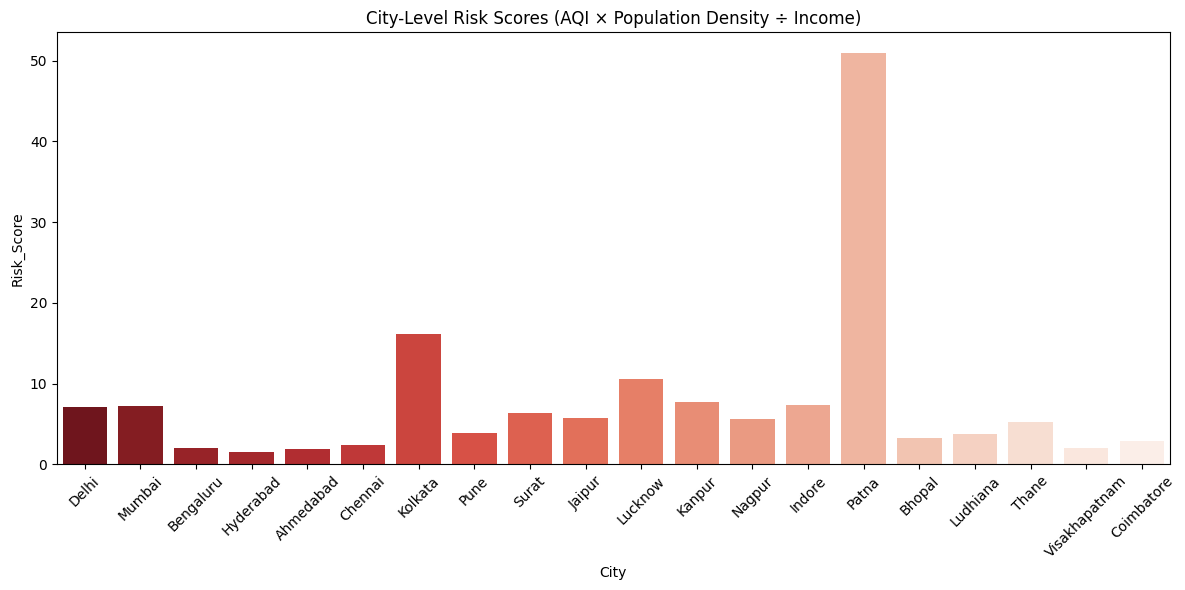

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(merged_df, x='City', y='Risk_Score', palette='Reds_r')
plt.xticks(rotation=45)
plt.title('City-Level Risk Scores (AQI × Population Density ÷ Income)')
plt.tight_layout()
plt.show()


In [30]:
merged_df.to_csv('Risk _cores.csv', index=False)
